In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('beta_analysis3.csv')
print(df.shape)
df.head()

(372, 8)


,beta,epoch,mae,multi_mae,average_variance,prop_90,prop_95,prop_99
0,0.1,15,0.460537,0.459773,-0.085036,0.490693,0.566967,0.693404
1,0.1,30,0.393827,0.394219,-0.710624,0.410796,0.479824,0.599897
2,0.1,45,0.364742,0.365321,-0.921408,0.398602,0.466194,0.585194
3,0.1,60,0.347591,0.348239,-1.052882,0.391860,0.458507,0.577545
4,0.1,75,0.336890,0.337579,-1.150083,0.386704,0.452771,0.570075


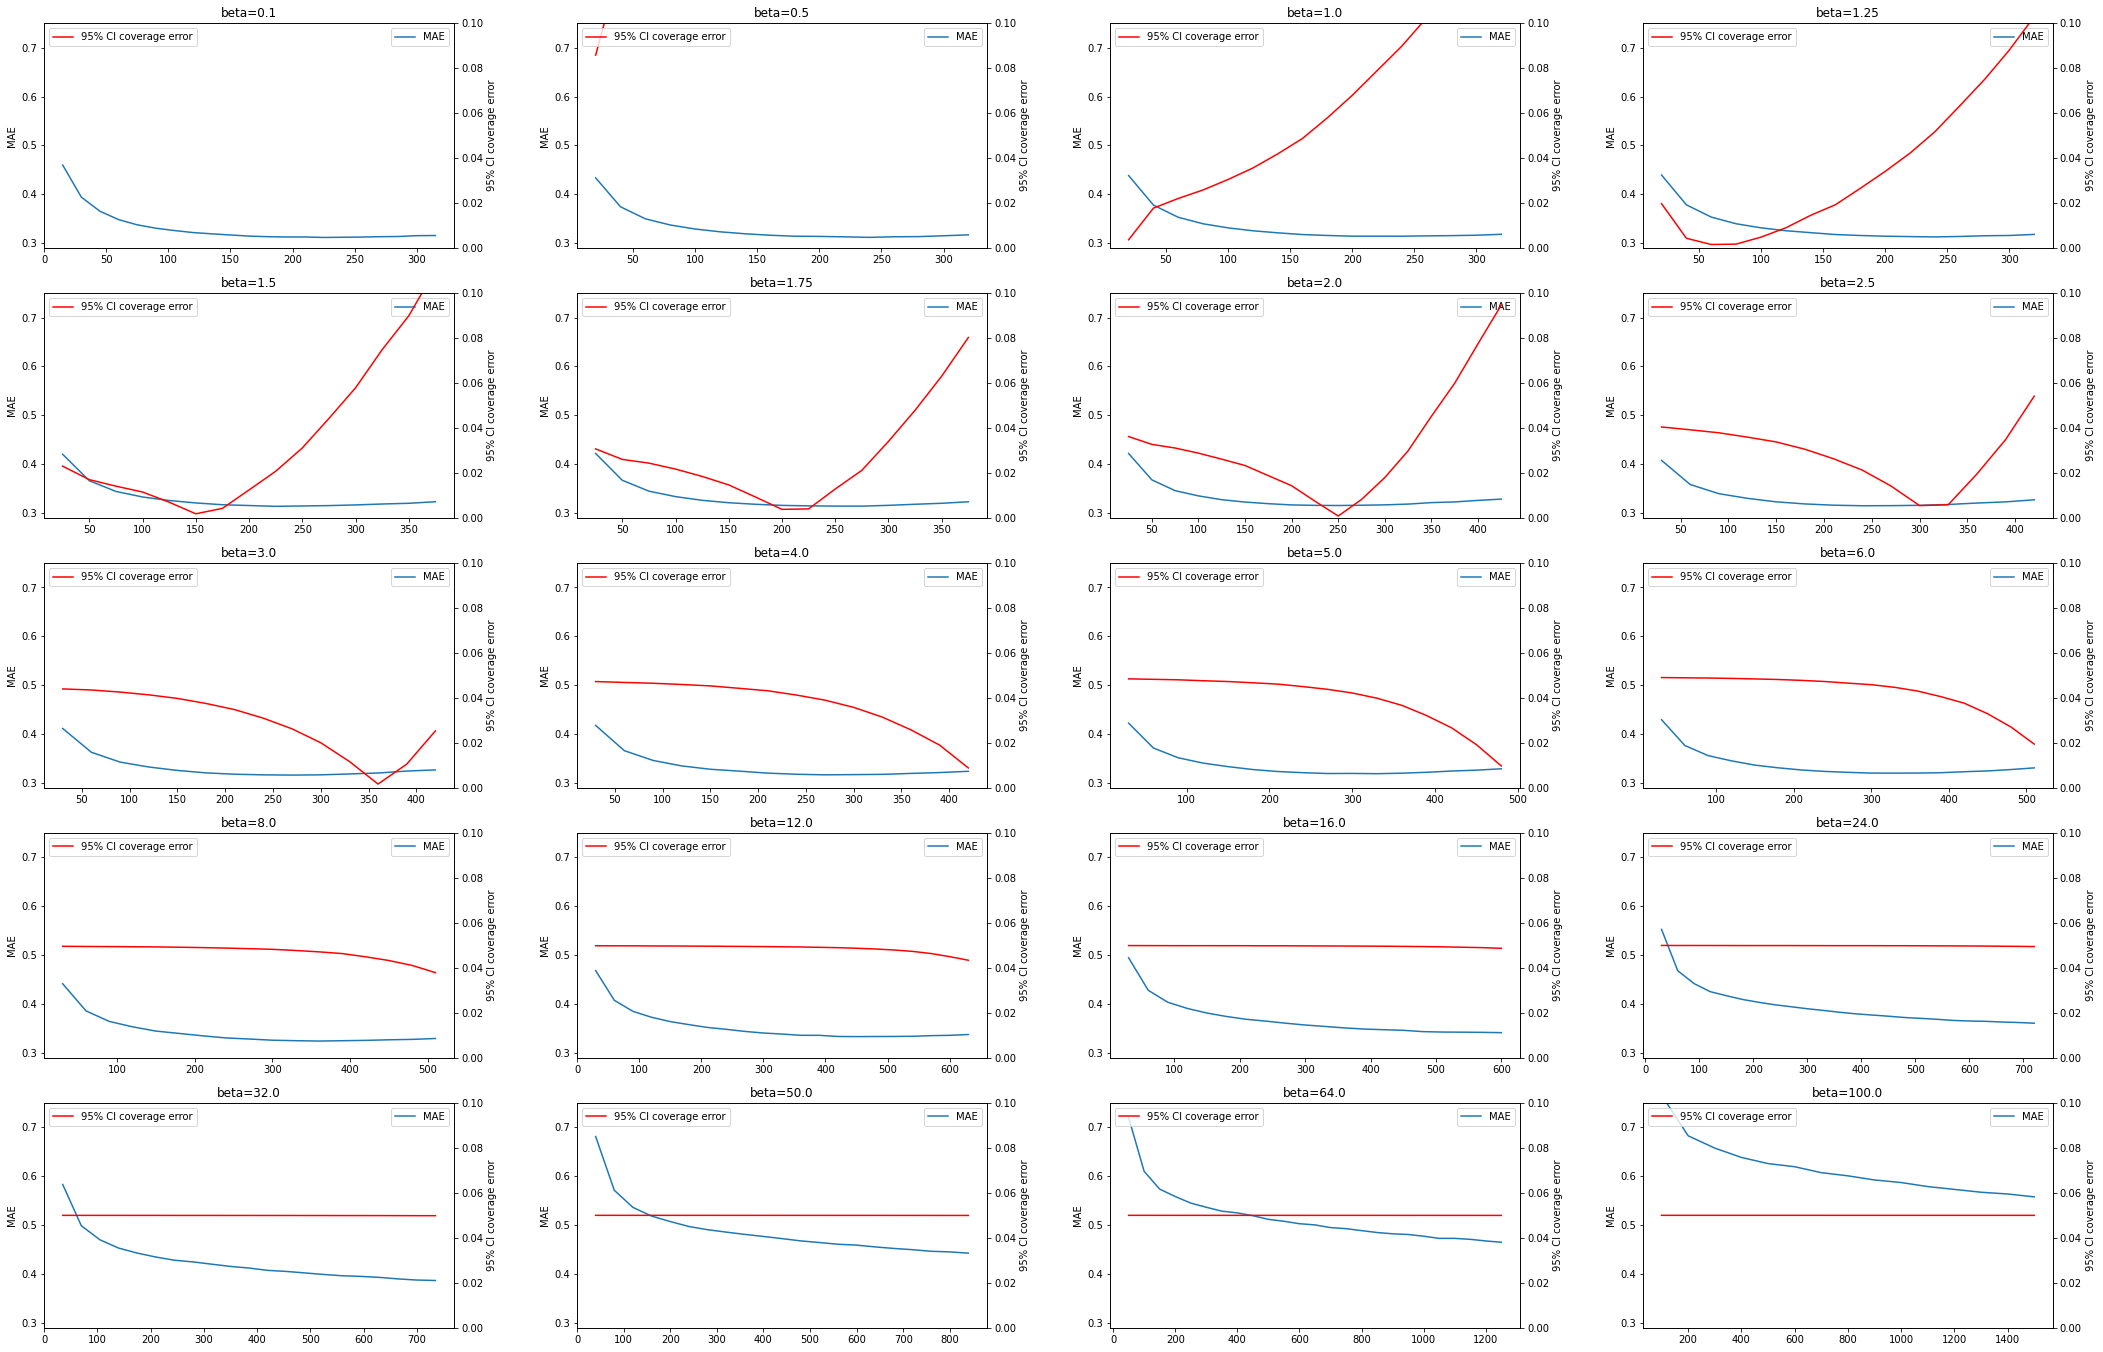

In [11]:
cols = 5
rows = 4
betas = df.beta.unique()
fig, axs = plt.subplots(cols, rows, figsize=(36, 24))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
for i in range(cols):
    for j in range(rows):
        beta = betas[i * rows + j]
        one_beta = df[df.beta==beta]
        x = one_beta.epoch.values
        y = one_beta.multi_mae.values
        axs[i,j].set_ylim([0.29, 0.75])
        axs[i,j].plot(x,y, label='MAE')
        axs[i,j].set_title('beta=' + str(beta))
        ax2=axs[i,j].twinx()
        ax2.set_ylim([0, 0.1])
        y2 = abs(one_beta.prop_95.values - 0.95)
        ax2.plot(x, y2, c='red', label='95% CI coverage error')
        axs[i,j].legend()
        axs[i,j].set_ylabel('MAE')
        ax2.set_ylabel('95% CI coverage error')
        ax2.legend(loc='upper left')
plt.savefig('output/beta_and_epochs_coverage_and_mae', facecolor='white')
plt.show()

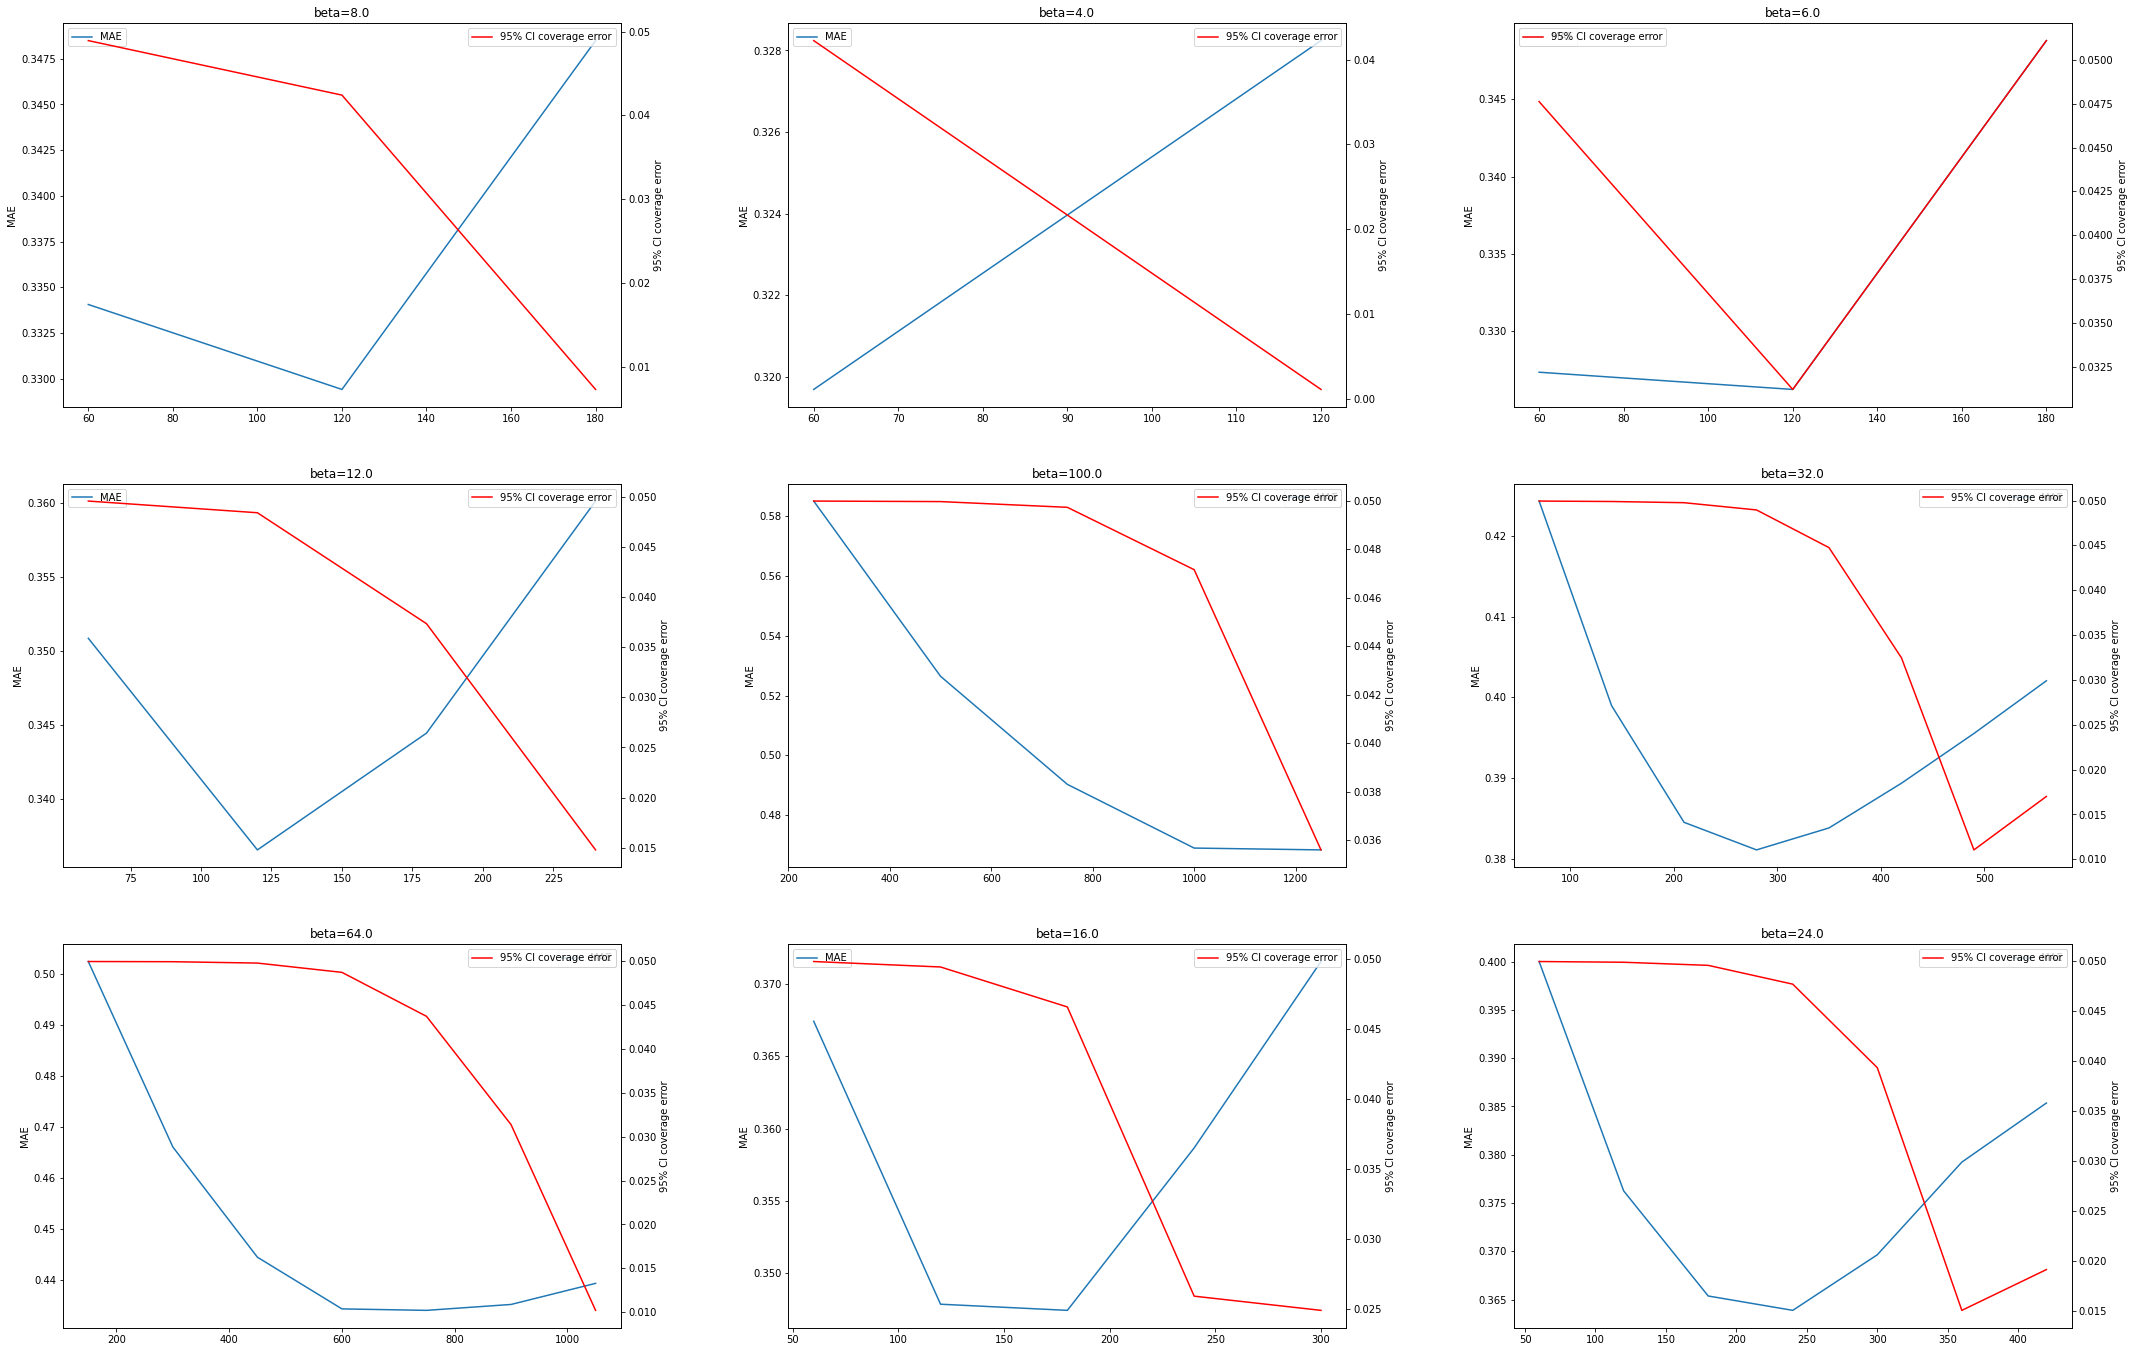

In [40]:
df2 = pd.read_csv('beta_analysis4.csv')
cols = 3
rows = 3
betas = df2.beta.unique()
fig, axs = plt.subplots(cols, rows, figsize=(36, 24))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
for i in range(cols):
    for j in range(rows):
        bet_ix = i * rows + j
        if bet_ix >= len(betas):
            break
        beta = betas[bet_ix]
        one_beta = df2[df2.beta==beta]
        x = one_beta.epoch.values
        y = one_beta.multi_mae.values
        axs[i,j].plot(x,y, label='MAE')
        axs[i,j].set_title('beta=' + str(beta))
        ax2=axs[i,j].twinx()
        y2 = abs(one_beta.prop_95.values - 0.95)
        ax2.plot(x, y2, c='red', label='95% CI coverage error')
        axs[i,j].legend()
        axs[i,j].set_ylabel('MAE')
        ax2.set_ylabel('95% CI coverage error')
        ax2.legend()
plt.savefig('output/beta_and_epochs_coverage_and_mae_high_betas', facecolor='white')
plt.show()

In [12]:
os.listdir()

['example_config_KNN.json',
 'example_config_SVD.json',
 'test_multiple_imputation.py',
 'example_config_VAE.json',
 '.DS_Store',
 'test_beta_VAE.py',
 'LICENSE',
 'requirements.txt',
 'evaluate_pseudo_Gibbs_eddie.py',
 'test_SVD.py',
 'top_up_train_saved_model.py',
 'evaluate_metropolis_gibbs_eddie.py',
 'dropout_analysis.xlsx',
 'cindex_cox_coeff.py',
 'experiments',
 'beta_analysis3.csv',
 'cindex_spearman_cor.py',
 'dropout_analysis.csv',
 'beta_analysis.csv',
 'beta_analysis4.csv',
 'preprocess',
 'output',
 'beta_analysis3_highlighted.csv',
 'compute_CIs.py',
 'old_beta_analysis.csv',
 'test_multiple_imputation_v2.py',
 '__pycache__',
 'nf_scripts',
 'training_history.pickle',
 'val_epoch_analysis.csv',
 'README.md',
 'run_betaVAE2.md',
 '1000_iterations_n_changes_per_index.png',
 'test_overfitting_5foldCV.py',
 'compile_NA_res.R',
 'JW_config_VAE.json',
 'submit_single_imputation.sh',
 'beta_analysis3_old.csv',
 'nextflow.config',
 'submit_importance_sampling.sh',
 '.gitignore',

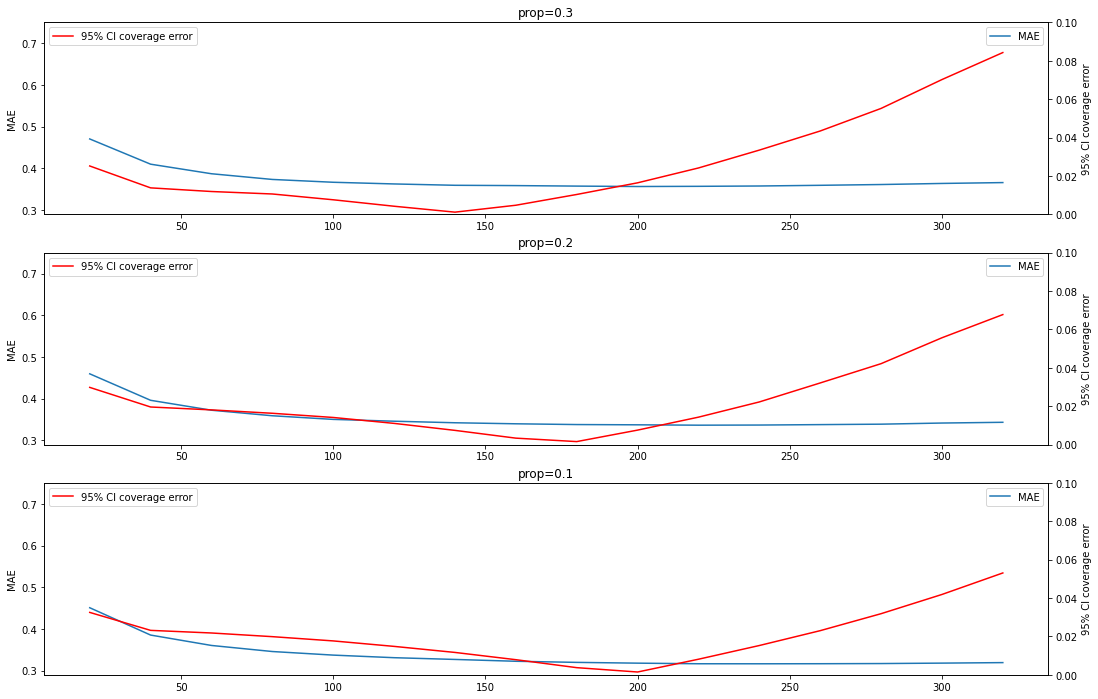

In [23]:
df2 = pd.read_csv('prop_miss_analysis.csv')
rows = 3
cols = 1
props = df2.miss_col.unique()
fig, axs = plt.subplots(rows, cols, figsize=(18, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.3, hspace=None)
for i in range(cols):
    for j in range(rows):
        prop = props[i * rows + j]
        one_prop = df2[df2.miss_col==prop]
        x = one_prop.epoch.values
        y = one_prop.multi_mae.values
        axs[j].set_ylim([0.29, 0.75])
        axs[j].plot(x,y, label='MAE')
        axs[j].set_title('prop=' + str(prop))
        ax2=axs[j].twinx()
        ax2.set_ylim([0, 0.1])
        y2 = abs(one_prop.prop_95.values - 0.95)
        ax2.plot(x, y2, c='red', label='95% CI coverage error')
        axs[j].legend()
        axs[j].set_ylabel('MAE')
        ax2.set_ylabel('95% CI coverage error')
        ax2.legend(loc='upper left')
plt.savefig('output/prop_and_epochs_coverage_and_mae', facecolor='white')
plt.show()